# Recurrent Neural Network (RNN)
### Goal of lesson
- Understand Recurrent Neural Network (RNN)
- Build a RNN on a timeseries

### Feed-Forward Neural Network
- Neural network that has connection only in one direction

### Recurrent Neural Network
- Neural network that generates output that feeds back into its own inputs
- Can do one-to-many and many-to-many relationship (not possible for feed-forward neural networks)
- This can generate sentences (while feed-forward neural network can only generate "words" or fixed sets of outputs)
- For time series 

### Examples Recurrent Neural Network
- Google translate
- Voice recognition
- Video copy right violation

### Theory
- It is complex - and luckily - not needed to understand in depth
- Quote of the author of Keras (Francios Chollet):
    - "*You don't need to understand everything about the specific architecutre of an LSTM cell [...] just that LSTM cell is meant to allow past information to be reinjected at a later time.*"

> #### Programming Notes:
> - Libraries used
>     - [**pandas**](https://pandas.pydata.org) - a data analysis and manipulation tool
>     - [**numpy**](http://numpy.org) - scientific computing with Python ([Lecture on NumPy](https://youtu.be/BpzpU8_j0-c))
>     - [**matplotlib**](http://matplotlib.org) - visualization with Python ([Lecture on **visualization**](https://youtu.be/htIh8YHh4xs))
>     - [**tensorflow**](https://www.tensorflow.org) - end-to-end open source machine learning platform
> - Functionality and concepts used
>     - [**CSV**](https://en.wikipedia.org/wiki/Comma-separated_values) file ([Lecture on CSV](https://youtu.be/LEyojSOg4EI))
>     - [**read_csv()**](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html) read a comma-separated values (csv) file into **pandas** DataFrame.
>     - [**Sequential**](https://www.tensorflow.org/api_docs/python/tf/keras/Sequential) provides training and inference features for a model
>     - [**Dense**](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Dense) regular densely-connected Neural Network (NN) layer.
>     - [**Dropout**](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Dropout) applies Dropout to the input
>     - [**LSTM**](https://www.tensorflow.org/api_docs/python/tf/keras/layers/LSTM) Long Short-Term Memory layer - Hochreiter 1997

In [71]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [72]:
data = pd.read_csv('files/aapl.csv', parse_dates=True, index_col=0)

In [73]:
data.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2000-01-03,1.004464,0.907924,0.936384,0.999442,535796800.0,0.858137
2000-01-04,0.987723,0.903460,0.966518,0.915179,512377600.0,0.785788
2000-01-05,0.987165,0.919643,0.926339,0.928571,778321600.0,0.797286
2000-01-06,0.955357,0.848214,0.947545,0.848214,767972800.0,0.728291
2000-01-07,0.901786,0.852679,0.861607,0.888393,460734400.0,0.762789


In [84]:
data_train = data.loc['2000':'2019', 'Adj Close'].to_numpy()
data_test = data.loc['2020', 'Adj Close'].to_numpy()

In [85]:
data_train

array([ 0.85813743,  0.78578764,  0.79728615, ..., 71.49375916,
       71.91808319, 72.44355774])

In [86]:
from sklearn.preprocessing import MinMaxScaler

In [87]:
scaler = MinMaxScaler()
data_train = scaler.fit_transform(data_train.reshape(-1, 1))
data_test = scaler.transform(data_test.reshape(-1, 1))

In [89]:
def data_preparation(data):
    x = []
    y = []

    for i in range(40, len(data)):
        x.append(data[i-40:i, 0])
        y.append(data[i])

    x = np.array(x)
    y = np.array(y)

    x = x.reshape(x.shape[0], x.shape[1], 1)
    
    return x, y

x_train, y_train = data_preparation(data_train)
x_test, y_test = data_preparation(data_test)

In [90]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((4991, 40, 1), (4991, 1), (213, 40, 1), (213, 1))

In [91]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dropout

In [92]:
y_train[0]

array([0.01104395])

In [100]:
model = Sequential()
model.add(LSTM(units=45, return_sequences=True, input_shape=(x_train.shape[1], 1)))
# model.add(Dropout(.2))
model.add(LSTM(units=45, return_sequences=True))
# model.add(Dropout(.2))
model.add(LSTM(units=45))
# model.add(Dropout(.2))
model.add(Dense(units=1))
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['accuracy'])
model.fit(x_train, y_train, epochs=5, batch_size=32)

Epoch 1/5
156/156 [==============================] - 7s 27ms/step - loss: 0.0027 - accuracy: 4.0072e-04
Epoch 2/5
156/156 [==============================] - 4s 27ms/step - loss: 2.6785e-04 - accuracy: 4.0072e-04
Epoch 3/5
156/156 [==============================] - 4s 27ms/step - loss: 2.3028e-04 - accuracy: 4.0072e-04
Epoch 4/5
156/156 [==============================] - 4s 27ms/step - loss: 1.9594e-04 - accuracy: 4.0072e-04
Epoch 5/5
156/156 [==============================] - 4s 27ms/step - loss: 1.8008e-04 - accuracy: 4.0072e-04


In [101]:
y_pred = model.predict(x_test)

In [102]:
y_pred.shape, x_test.shape

((213, 1), (213, 40, 1))

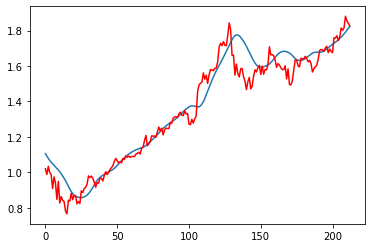

In [103]:
fig, ax = plt.subplots()
ax.plot(y_pred)
ax.plot(y_test, c='r')

In [104]:
y_unscaled_pred = scaler.inverse_transform(y_pred)

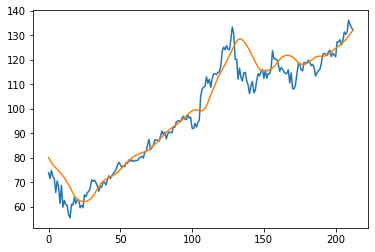

In [105]:
fig, ax = plt.subplots()
y_read = data.loc['2020', 'Adj Close'].to_numpy()
ax.plot(y_read[40:])
ax.plot(y_unscaled_pred)